**ĐỌC VÀ XỬ LÝ DỮ LIỆU**

In [2]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#nhập dl
my_df=pd.read_csv('/content/drive/MyDrive/filedata.csv')


In [4]:
my_df.head(5)

,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,"Travel Country, Correct",Source of Infection,Relationship,Flight ID (Date),Infection Cluster,Health Condition When Confirmed,Detail Symptoms When Confirmed (clean up),Detail Symptoms When Confirmed,Developing Symptoms,Underlying Health Condition,Discharged Date,Re-Infected,Re-discharged,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Note,Number of negative test before discharged
0,BN1,M,66.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,1,Wuhan(China),China,NaN,NaN,NaN,NaN,Cold/Flu-like symptoms,fever,fever,NaN,NaN,2/12/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ha...,NaN,NaN,NaN,NaN,NaN,NaN
1,BN2,M,28.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,0,NaN,NaN,F1 of BN1,Son,NaN,NaN,Cold/Flu-like symptoms,fever,fever,NaN,NaN,2/4/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BN3,F,25.0,Vietnam,Thanh Hoa,Thanh Hoa,Bệnh viện đa khoa tỉnh Thanh Hóa,1/30/20,1,Wuhan(China),China,NaN,NaN,NaN,NaN,Cold/Flu-like symptoms,"fever, cough","fever, cough",NaN,NaN,"(Feb 2020, no exact date)",NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,NaN,NaN,NaN,NaN,NaN,NaN
3,BN4,M,29.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh Nhiệt đới Trung Ương (cơ sở Đôn...,1/30/20,1,Wuhan(China),China,NaN,NaN,NaN,Vinh Phuc,Cold/Flu-like symptoms,"fever, cough, sore throat","fever, cough, sore throat",NaN,NaN,2/18/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,https://vnexpress.net/suc-khoe/hai-benh-nhan-c...,https://bnews.vn/dich-do-virus-corona-them-2-b...,NaN,NaN,NaN,NaN
4,BN5,F,23.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh nhiệt đới Trung Ương (cơ sở 2),1/30/20,1,Wuhan(China),China,NaN,NaN,NaN,Vinh Phuc,Showing symptoms (no detail),NaN,showing symptoms (not show exactly symptoms),NaN,NaN,2/10/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
my_df

In [5]:
#kích thước dl
my_df.shape

(288, 30)

In [6]:
#thông tin dl
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         288 non-null    object 
 1   Gender                                     288 non-null    object 
 2   Age                                        288 non-null    float64
 3   Nationality                                288 non-null    object 
 4   Detection Location                         288 non-null    object 
 5   Treatment Location                         288 non-null    object 
 6   Hospital                                   288 non-null    object 
 7   Confirmed Date                             288 non-null    object 
 8   Travel History                             288 non-null    int64  
 9   Travel Country                             184 non-null    object 
 10  Travel Country, Correct   

In [7]:
#in ra các cột 
my_df.columns


Index(['ID', 'Gender', 'Age', 'Nationality', 'Detection Location',
       'Treatment Location', 'Hospital', 'Confirmed Date', 'Travel History',
       'Travel Country', 'Travel Country, Correct', 'Source of Infection',
       'Relationship', 'Flight ID (Date)', 'Infection Cluster',
       'Health Condition When Confirmed',
       'Detail Symptoms When Confirmed (clean up)',
       'Detail Symptoms When Confirmed', 'Developing Symptoms',
       'Underlying Health Condition', 'Discharged Date', 'Re-Infected',
       'Re-discharged', 'Reference 1', 'Reference 2', 'Reference 3',
       'Reference 4', 'Reference 5', 'Note',
       'Number of negative test before discharged'],
      dtype='object')

In [ ]:
list(my_df.columns)

In [8]:
my_df.index

RangeIndex(start=0, stop=288, step=1)

In [9]:
my_df.describe()

,Age,Travel History
count,288.000000,288.000000
mean,35.448785,0.638889
std,15.696996,0.481159
min,0.250000,0.000000
25%,23.000000,0.000000
50%,30.000000,1.000000
75%,47.000000,1.000000
max,88.000000,1.000000


In [10]:
#tổng số dòng k null
my_df.count()

ID                                           288
Gender                                       288
Age                                          288
Nationality                                  288
Detection Location                           288
Treatment Location                           288
Hospital                                     288
Confirmed Date                               288
Travel History                               288
Travel Country                               184
Travel Country, Correct                      175
Source of Infection                           80
Relationship                                 102
Flight ID (Date)                             173
Infection Cluster                            134
Health Condition When Confirmed              288
Detail Symptoms When Confirmed (clean up)     86
Detail Symptoms When Confirmed               288
Developing Symptoms                           13
Underlying Health Condition                    9
Discharged Date     

In [11]:
my_df.head(4)


,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,"Travel Country, Correct",Source of Infection,Relationship,Flight ID (Date),Infection Cluster,Health Condition When Confirmed,Detail Symptoms When Confirmed (clean up),Detail Symptoms When Confirmed,Developing Symptoms,Underlying Health Condition,Discharged Date,Re-Infected,Re-discharged,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Note,Number of negative test before discharged
0,BN1,M,66.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,1,Wuhan(China),China,NaN,NaN,NaN,NaN,Cold/Flu-like symptoms,fever,fever,NaN,NaN,2/12/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ha...,NaN,NaN,NaN,NaN,NaN,NaN
1,BN2,M,28.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,0,NaN,NaN,F1 of BN1,Son,NaN,NaN,Cold/Flu-like symptoms,fever,fever,NaN,NaN,2/4/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BN3,F,25.0,Vietnam,Thanh Hoa,Thanh Hoa,Bệnh viện đa khoa tỉnh Thanh Hóa,1/30/20,1,Wuhan(China),China,NaN,NaN,NaN,NaN,Cold/Flu-like symptoms,"fever, cough","fever, cough",NaN,NaN,"(Feb 2020, no exact date)",NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,NaN,NaN,NaN,NaN,NaN,NaN
3,BN4,M,29.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh Nhiệt đới Trung Ương (cơ sở Đôn...,1/30/20,1,Wuhan(China),China,NaN,NaN,NaN,Vinh Phuc,Cold/Flu-like symptoms,"fever, cough, sore throat","fever, cough, sore throat",NaN,NaN,2/18/20,NaN,NaN,https://vnexpress.net/dich-viem-phoi-corona/ba...,https://vnexpress.net/suc-khoe/hai-benh-nhan-c...,https://bnews.vn/dich-do-virus-corona-them-2-b...,NaN,NaN,NaN,NaN


In [12]:
#xóa các cột trùng và không cần thiết
# xóa Travel Country, Correct; Detail Symptoms When Confirmed (clean up); Reference 1/2/3/4/5,
# note, Number of negative test before discharged
my_df=my_df.drop(my_df.columns[[10,16,23,24,25,26,27,28,29]], axis=1)
my_df

,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,Source of Infection,Relationship,Flight ID (Date),Infection Cluster,Health Condition When Confirmed,Detail Symptoms When Confirmed,Developing Symptoms,Underlying Health Condition,Discharged Date,Re-Infected,Re-discharged
0,BN1,M,66.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,1,Wuhan(China),NaN,NaN,NaN,NaN,Cold/Flu-like symptoms,fever,NaN,NaN,2/12/20,NaN,NaN
1,BN2,M,28.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,1/23/20,0,NaN,F1 of BN1,Son,NaN,NaN,Cold/Flu-like symptoms,fever,NaN,NaN,2/4/20,NaN,NaN
2,BN3,F,25.0,Vietnam,Thanh Hoa,Thanh Hoa,Bệnh viện đa khoa tỉnh Thanh Hóa,1/30/20,1,Wuhan(China),NaN,NaN,NaN,NaN,Cold/Flu-like symptoms,"fever, cough",NaN,NaN,"(Feb 2020, no exact date)",NaN,NaN
3,BN4,M,29.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh Nhiệt đới Trung Ương (cơ sở Đôn...,1/30/20,1,Wuhan(China),NaN,NaN,NaN,Vinh Phuc,Cold/Flu-like symptoms,"fever, cough, sore throat",NaN,NaN,2/18/20,NaN,NaN
4,BN5,F,23.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh nhiệt đới Trung Ương (cơ sở 2),1/30/20,1,Wuhan(China),NaN,NaN,NaN,Vinh Phuc,Showing symptoms (no detail),showing symptoms (not show exactly symptoms),NaN,NaN,2/10/20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,BN284,F,30.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,NaN,NaN,VN0088(05/07/2020),NaN,Not reported (Stable condition),Not reported (Stable condition),NaN,NaN,NaN,NaN,NaN
284,BN285,F,30.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,NaN,NaN,VN0088(05/07/2020),NaN,Not reported (Stable condition),Not reported (Stable condition),NaN,NaN,NaN,NaN,NaN
285,BN286,F,23.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,NaN,NaN,VN0088(05/07/2020),NaN,Not reported (Stable condition),Not reported (Stable condition),NaN,NaN,NaN,NaN,NaN
286,BN287,M,28.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,NaN,NaN,VN0088(05/07/2020),NaN,Not reported (Stable condition),Not reported (Stable condition),NaN,NaN,NaN,NaN,NaN


In [13]:
my_df.dtypes

ID                                  object
Gender                              object
Age                                float64
Nationality                         object
Detection Location                  object
Treatment Location                  object
Hospital                            object
Confirmed Date                      object
Travel History                       int64
Travel Country                      object
Source of Infection                 object
Relationship                        object
Flight ID (Date)                    object
Infection Cluster                   object
Health Condition When Confirmed     object
Detail Symptoms When Confirmed      object
Developing Symptoms                 object
Underlying Health Condition         object
Discharged Date                     object
Re-Infected                         object
Re-discharged                       object
dtype: object

In [14]:
#chuyển cột dữ liệu ngày về dạng date
my_df['Confirmed Date'] = pd.to_datetime(my_df['Confirmed Date'])
my_df['Re-Infected'] = pd.to_datetime(my_df['Re-Infected'])
my_df['Re-discharged'] = pd.to_datetime(my_df['Re-discharged'])



In [15]:
my_df['Age'] = my_df['Age'].astype(int)

In [16]:
my_df.dtypes

ID                                         object
Gender                                     object
Age                                         int64
Nationality                                object
Detection Location                         object
Treatment Location                         object
Hospital                                   object
Confirmed Date                     datetime64[ns]
Travel History                              int64
Travel Country                             object
Source of Infection                        object
Relationship                               object
Flight ID (Date)                           object
Infection Cluster                          object
Health Condition When Confirmed            object
Detail Symptoms When Confirmed             object
Developing Symptoms                        object
Underlying Health Condition                object
Discharged Date                            object
Re-Infected                        datetime64[ns]


In [ ]:
print(my_df['Confirmed Date'])
print(my_df['Re-Infected'])
print(my_df['Re-discharged'])

In [17]:
#tổng phần tử rỗng
my_df.isnull().sum()

ID                                   0
Gender                               0
Age                                  0
Nationality                          0
Detection Location                   0
Treatment Location                   0
Hospital                             0
Confirmed Date                       0
Travel History                       0
Travel Country                     104
Source of Infection                208
Relationship                       186
Flight ID (Date)                   115
Infection Cluster                  154
Health Condition When Confirmed      0
Detail Symptoms When Confirmed       0
Developing Symptoms                275
Underlying Health Condition        279
Discharged Date                     67
Re-Infected                        272
Re-discharged                      286
dtype: int64

In [ ]:
#phần trăm missing values của từng cột dữ liệu
NAN = [(c, my_df[c].isna().mean()*100) for c in my_df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
print(NAN)

In [18]:
#xử lý các cột bị thiếu
my_df['Travel Country'] = my_df['Travel Country'].fillna(0)
my_df['Source of Infection'] = my_df['Source of Infection'].fillna(0)
my_df['Relationship'] = my_df['Relationship'].fillna(0)
my_df['Flight ID (Date)'] = my_df['Flight ID (Date)'].fillna(0)
my_df['Infection Cluster'] = my_df['Infection Cluster'].fillna('Unknown')
my_df['Developing Symptoms'] = my_df['Developing Symptoms'].fillna('Unknown')
my_df['Underlying Health Condition'] = my_df['Underlying Health Condition'].fillna('Unknown')
my_df['Discharged Date'] = my_df['Discharged Date'].fillna(0)
my_df['Re-Infected'] = my_df['Re-Infected'].fillna(0)
my_df['Re-discharged'] = my_df['Re-discharged'].fillna(0)


In [19]:
my_df.isna().sum()

ID                                 0
Gender                             0
Age                                0
Nationality                        0
Detection Location                 0
Treatment Location                 0
Hospital                           0
Confirmed Date                     0
Travel History                     0
Travel Country                     0
Source of Infection                0
Relationship                       0
Flight ID (Date)                   0
Infection Cluster                  0
Health Condition When Confirmed    0
Detail Symptoms When Confirmed     0
Developing Symptoms                0
Underlying Health Condition        0
Discharged Date                    0
Re-Infected                        0
Re-discharged                      0
dtype: int64

In [20]:
my_df['Confirmed cases']= np.where(my_df['Confirmed Date']=='',0,1)
my_df['Recovered']= np.where(my_df['Discharged Date']==0,0,1)
my_df.head()

,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,Source of Infection,Relationship,Flight ID (Date),Infection Cluster,Health Condition When Confirmed,Detail Symptoms When Confirmed,Developing Symptoms,Underlying Health Condition,Discharged Date,Re-Infected,Re-discharged,Confirmed cases,Recovered
0,BN1,M,66,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,2020-01-23,1,Wuhan(China),0,0,0,Unknown,Cold/Flu-like symptoms,fever,Unknown,Unknown,2/12/20,0,0,1,1
1,BN2,M,28,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,2020-01-23,0,0,F1 of BN1,Son,0,Unknown,Cold/Flu-like symptoms,fever,Unknown,Unknown,2/4/20,0,0,1,1
2,BN3,F,25,Vietnam,Thanh Hoa,Thanh Hoa,Bệnh viện đa khoa tỉnh Thanh Hóa,2020-01-30,1,Wuhan(China),0,0,0,Unknown,Cold/Flu-like symptoms,"fever, cough",Unknown,Unknown,"(Feb 2020, no exact date)",0,0,1,1
3,BN4,M,29,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh Nhiệt đới Trung Ương (cơ sở Đôn...,2020-01-30,1,Wuhan(China),0,0,0,Vinh Phuc,Cold/Flu-like symptoms,"fever, cough, sore throat",Unknown,Unknown,2/18/20,0,0,1,1
4,BN5,F,23,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh nhiệt đới Trung Ương (cơ sở 2),2020-01-30,1,Wuhan(China),0,0,0,Vinh Phuc,Showing symptoms (no detail),showing symptoms (not show exactly symptoms),Unknown,Unknown,2/10/20,0,0,1,1


In [85]:
my_df.['total cases']=my_df.['Detection Location'].sum()

SyntaxError: ignored

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 


In [ ]:
my_df['Gender'] = label_encoder.fit_transform(my_df['Gender'])

my_df

,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,Source of Infection,Relationship,Flight ID (Date),Infection Cluster,Health Condition When Confirmed,Detail Symptoms When Confirmed,Developing Symptoms,Underlying Health Condition,Discharged Date,Re-Infected,Re-discharged
0,BN1,1,66.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,2020-01-23,1,Wuhan(China),0,0,0,Unknown,Cold/Flu-like symptoms,fever,Unknown,Unknown,2/12/20,0,0
1,BN2,1,28.0,China,Ho Chi Minh City,Ho Chi Minh City,Bệnh viện Chợ Rẫy,2020-01-23,0,0,F1 of BN1,Son,0,Unknown,Cold/Flu-like symptoms,fever,Unknown,Unknown,2/4/20,0,0
2,BN3,0,25.0,Vietnam,Thanh Hoa,Thanh Hoa,Bệnh viện đa khoa tỉnh Thanh Hóa,2020-01-30,1,Wuhan(China),0,0,0,Unknown,Cold/Flu-like symptoms,"fever, cough",Unknown,Unknown,"(Feb 2020, no exact date)",0,0
3,BN4,1,29.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh Nhiệt đới Trung Ương (cơ sở Đôn...,2020-01-30,1,Wuhan(China),0,0,0,Vinh Phuc,Cold/Flu-like symptoms,"fever, cough, sore throat",Unknown,Unknown,2/18/20,0,0
4,BN5,0,23.0,Vietnam,Vinh Phuc,Vinh Phuc,Bệnh viện Bệnh nhiệt đới Trung Ương (cơ sở 2),2020-01-30,1,Wuhan(China),0,0,0,Vinh Phuc,Showing symptoms (no detail),showing symptoms (not show exactly symptoms),Unknown,Unknown,2/10/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,BN284,0,30.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,2020-05-07,1,United Arab Emirates,0,0,VN0088(05/07/2020),Unknown,Not reported (Stable condition),Not reported (Stable condition),Unknown,Unknown,0,0,0
284,BN285,0,30.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,2020-05-07,1,United Arab Emirates,0,0,VN0088(05/07/2020),Unknown,Not reported (Stable condition),Not reported (Stable condition),Unknown,Unknown,0,0,0
285,BN286,0,23.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,2020-05-07,1,United Arab Emirates,0,0,VN0088(05/07/2020),Unknown,Not reported (Stable condition),Not reported (Stable condition),Unknown,Unknown,0,0,0
286,BN287,1,28.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,2020-05-07,1,United Arab Emirates,0,0,VN0088(05/07/2020),Unknown,Not reported (Stable condition),Not reported (Stable condition),Unknown,Unknown,0,0,0


In [ ]:
my_df.loc[1,]

TRỰC QUAN HÓA DỮ LIỆU


In [21]:
group_df = my_df[['ID','Gender']]
group_df

,ID,Gender
0,BN1,M
1,BN2,M
2,BN3,F
3,BN4,M
4,BN5,F
...,...,...
283,BN284,F
284,BN285,F
285,BN286,F
286,BN287,M


In [22]:
group_df = group_df.groupby('Gender').size()
group_df

Gender
F    158
M    130
dtype: int64

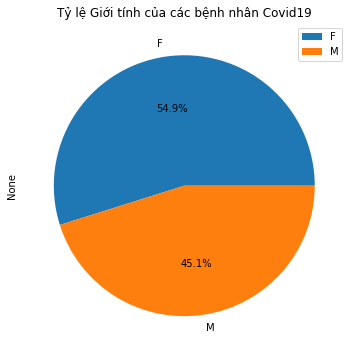

In [23]:
#group_df.plot.pie(subplots=True, figsize=(11, 6))
group_df.plot.pie(y = 'Gender',title='Tỷ lệ Giới tính của các bệnh nhân Covid19',figsize=(11, 6),autopct='%1.1f%%')
plt.legend(loc='upper right');

In [24]:
age= my_df["Age"].sort_values()
age

14      0
273     1
39      2
251     6
101     9
       ..
48     71
238    71
6      73
27     74
160    88
Name: Age, Length: 288, dtype: int64

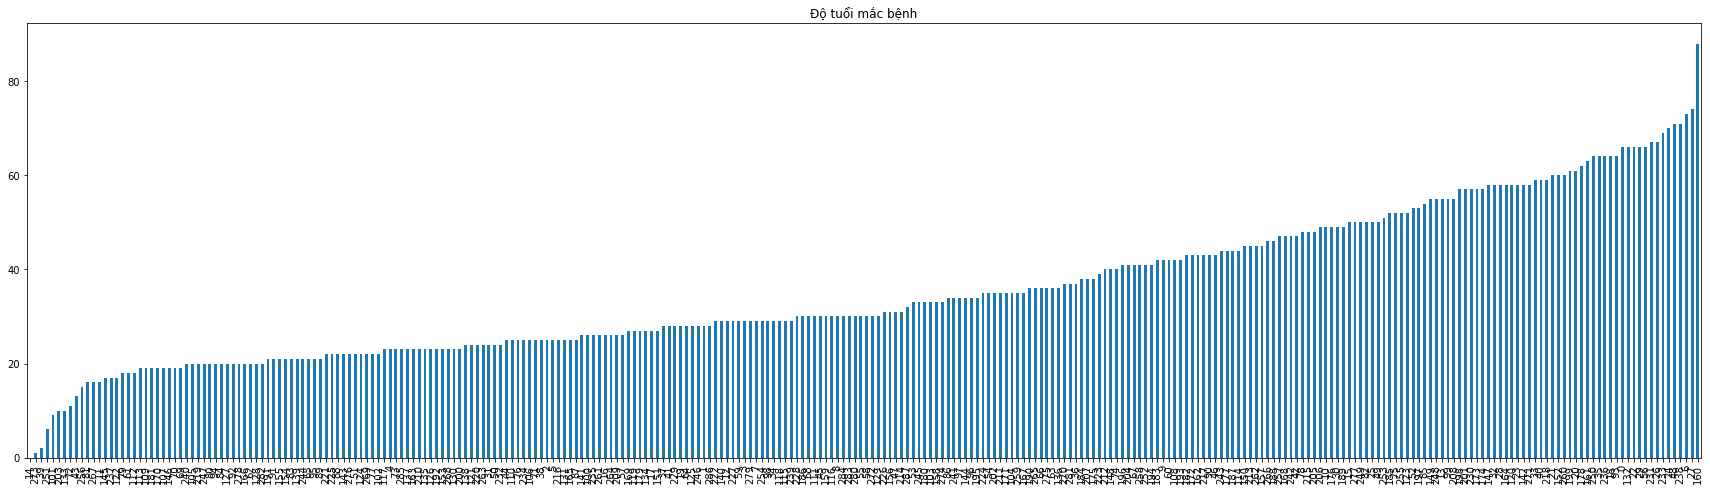

In [25]:
age.plot(kind="bar",figsize=(30,8),title='Độ tuổi mắc bệnh')



In [88]:

#ktra tổng số thành phố phát hiện mắc covid19
#len(my_df['Detection Location'].unique())

In [26]:
df_city = my_df[['ID','Detection Location','Confirmed cases']]
df_city

,ID,Detection Location,Confirmed cases
0,BN1,Ho Chi Minh City,1
1,BN2,Ho Chi Minh City,1
2,BN3,Thanh Hoa,1
3,BN4,Vinh Phuc,1
4,BN5,Vinh Phuc,1
...,...,...,...
283,BN284,Can Tho,1
284,BN285,Can Tho,1
285,BN286,Can Tho,1
286,BN287,Can Tho,1


In [27]:

df_city = my_df.groupby(['Detection Location'],as_index=False).sum()
df_city

,Detection Location,Age,Travel History,Confirmed cases,Recovered
0,Bac Giang,78,3,3,3
1,Bac Lieu,62,3,3,1
2,Bac Ninh,23,1,1,1
3,Ben Tre,17,1,1,1
4,Binh Thuan,337,1,9,9
5,Can Tho,566,19,19,2
6,Da Nang,253,5,6,6
7,Dong Nai,28,0,1,1
8,Dong Thap,90,4,4,4
9,Ha Giang,16,0,1,1


In [157]:
df_city.to_csv('df_city')


In [28]:
# top 10 TP có Confirmed cases	lớn nhất
df_city.sort_values('Confirmed cases',ascending=False).head(10)

,Detection Location,Age,Travel History,Confirmed cases,Recovered
13,Hanoi,4121,55,112,87
14,Ho Chi Minh City,1976,37,56,50
29,Vinh Phuc,676,12,19,16
5,Can Tho,566,19,19,2
20,Ninh Binh,378,12,13,5
4,Binh Thuan,337,1,9,9
6,Da Nang,253,5,6,6
23,Quang Ninh,294,6,6,6
8,Dong Thap,90,4,4,4
11,Ha Tinh,86,4,4,2


Text(0.5, 1.0, 'Top 10 Thành phố có Confirmed cases lớn nhất ')

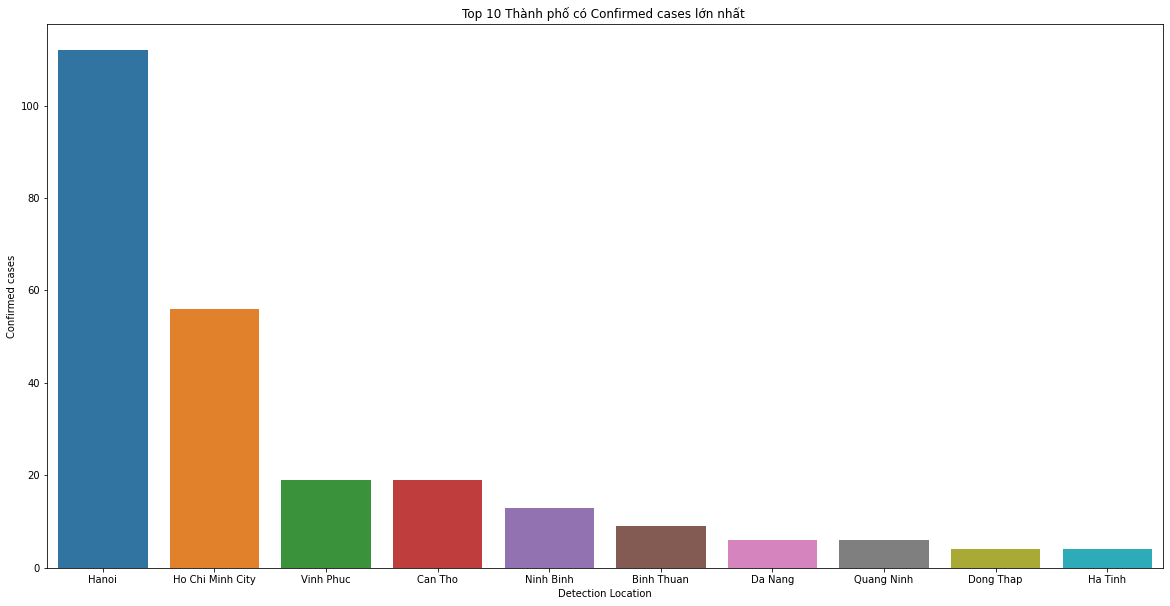

In [29]:
top10=df_city.sort_values('Confirmed cases',ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='Detection Location',y='Confirmed cases',data=top10)
plt.title('Top 10 Thành phố có Confirmed cases lớn nhất ')



Text(0.5, 1.0, 'Top 10 Thành phố có ít Confirmed cases nhất ')

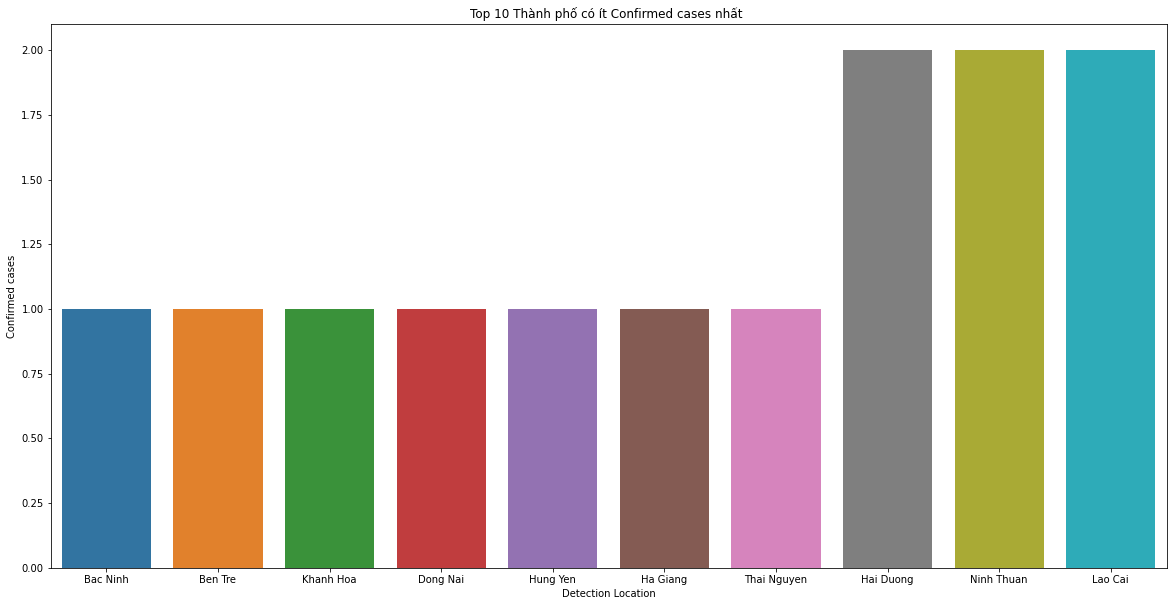

In [30]:
# top 10 TP có ít Confirmed cases	nhất
top10=df_city.sort_values('Confirmed cases',ascending=True).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='Detection Location',y='Confirmed cases',data=top10)
plt.title('Top 10 Thành phố có ít Confirmed cases nhất ')

Text(0.5, 1.0, 'Top 10 Thành phố có Recovered cases nhiều nhất ')

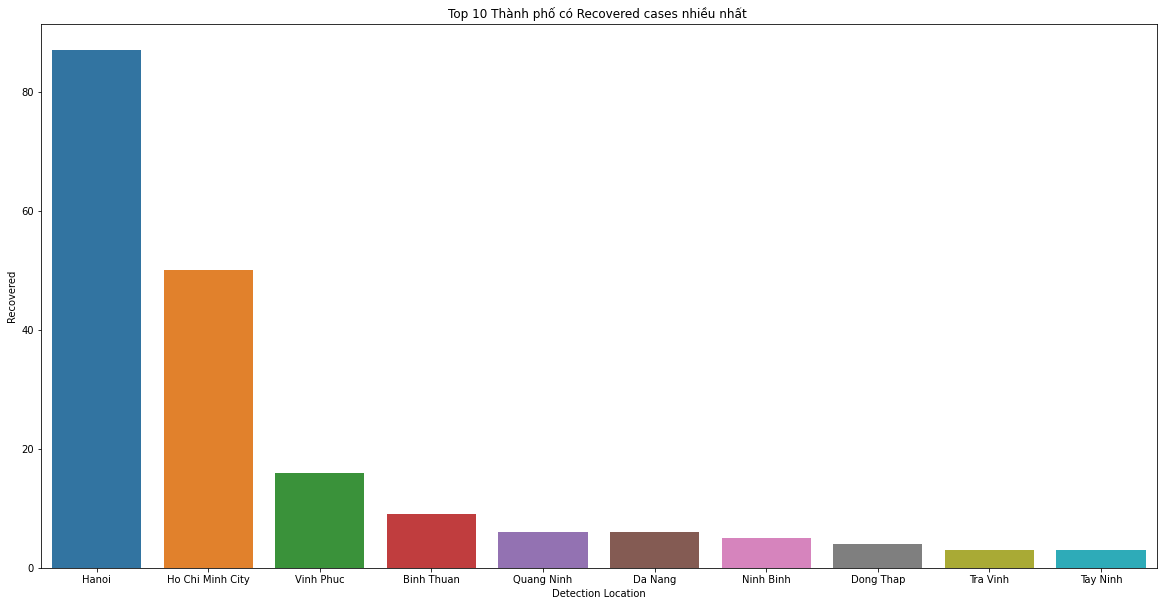

In [31]:
#top 10 có Recovered Cases lớn nhất
top10=df_city.sort_values('Recovered',ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='Detection Location',y='Recovered',data=top10)
plt.title('Top 10 Thành phố có Recovered cases nhiều nhất ')


Text(0.5, 1.0, 'Top 10 Thành phố có ít Recovered cases nhất ')

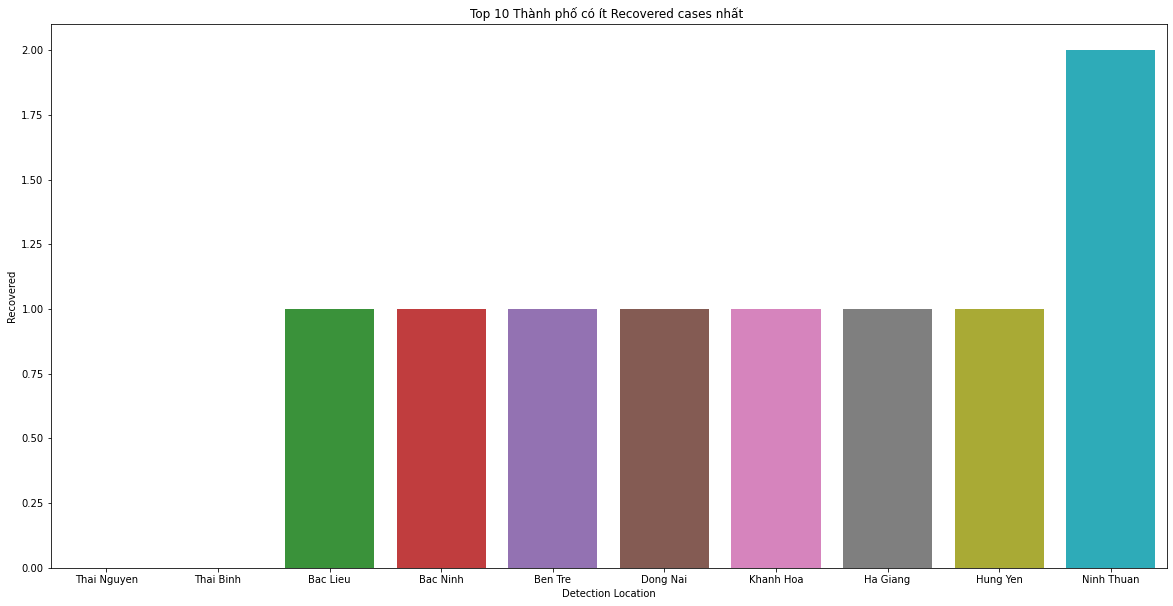

In [32]:
#top 10 có ít Recovered Cases nhất
top10=df_city.sort_values('Recovered',ascending=True).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='Detection Location',y='Recovered',data=top10)
plt.title('Top 10 Thành phố có ít Recovered cases nhất ')

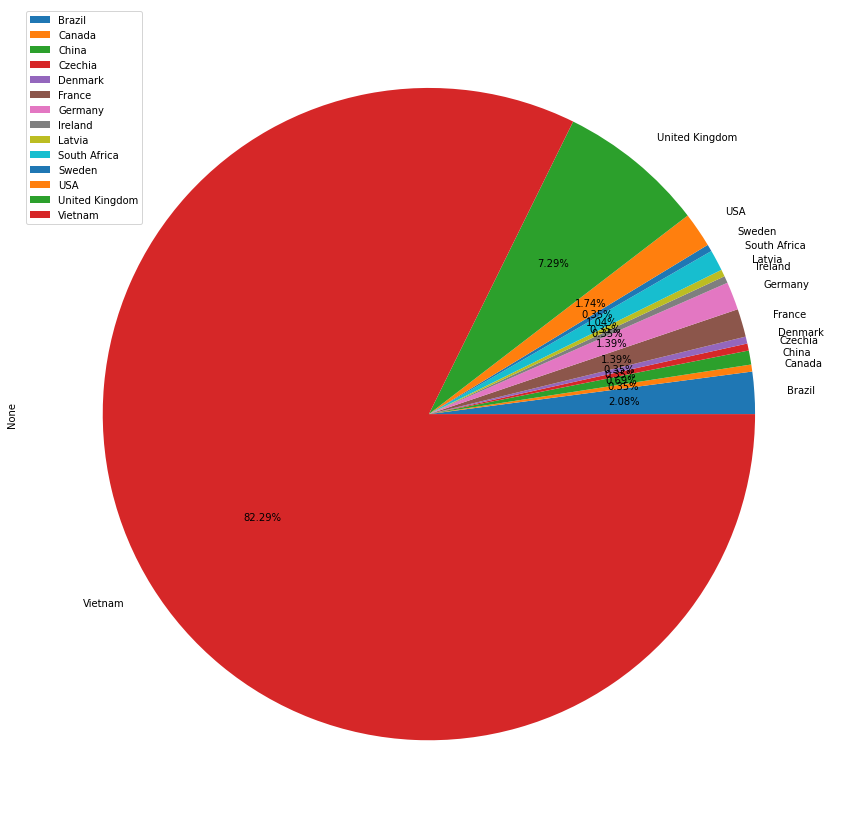

In [33]:
n_group=my_df.groupby('Nationality').size()
n_group.plot(kind='pie', figsize=[15,15], autopct='%.2f%%')
plt.legend(loc='upper left');

In [34]:
t_group=my_df.groupby('Travel History').size()
t_group

Travel History
0    104
1    184
dtype: int64

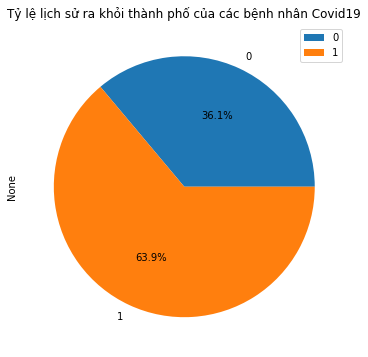

In [35]:
t_group.plot(kind='pie',title='Tỷ lệ lịch sử ra khỏi thành phố của các bệnh nhân Covid19',figsize=(11, 6),autopct='%1.1f%%')
plt.legend(loc='upper right');

In [38]:
df=my_df.groupby('Gender')['Age'].mean()
df

Gender
F    34.930380
M    36.076923
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

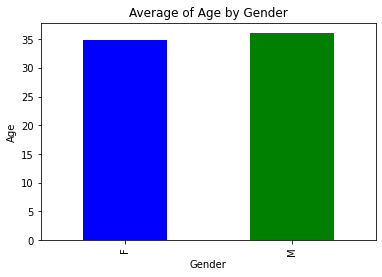

In [37]:
df.plot(kind='bar', color =['blue', 'green'])
plt.title('Average of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')


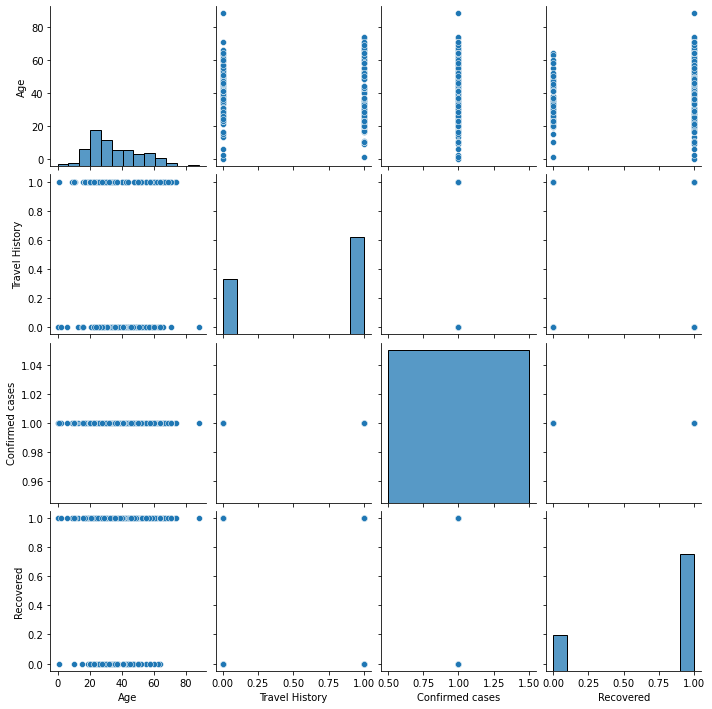

In [41]:
#Pair Plot
sns.pairplot(data=my_df,kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

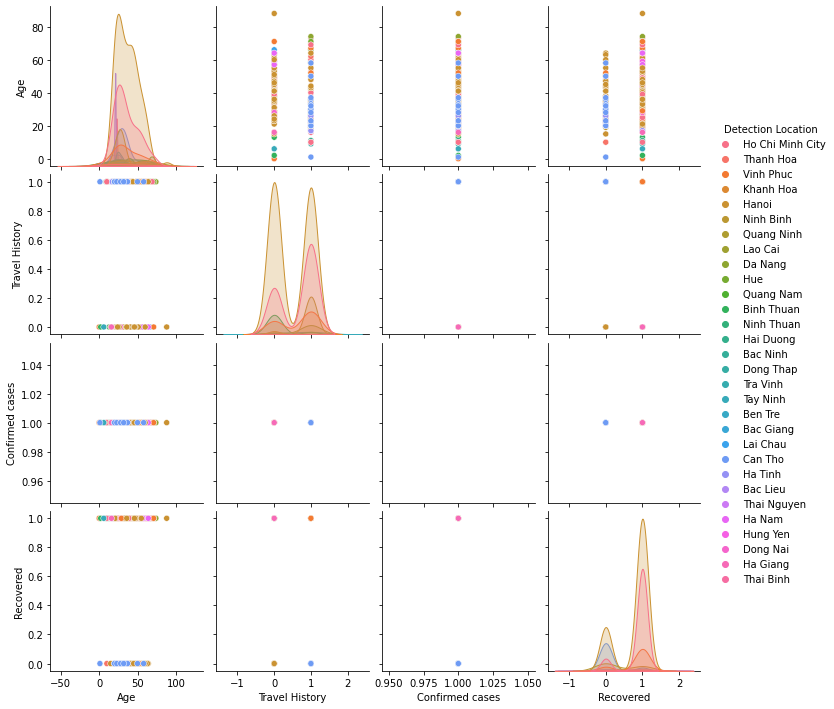

In [42]:
sns.pairplot(my_df,hue='Detection Location')